In [1]:
import os
import pandas as pd

# Directory path
dir_path = 'D:\\VScode\\Last_deglaciation\\data_fig3\\all_inso'

# List all .txt files in the directory
all_files = [f for f in os.listdir(dir_path) if f.endswith('.txt')]
# remove 'j_0north.txt' from the list
selected_files=all_files
# selected_files.remove('j_0north.txt')

# # remove the 'j_90north.txt'
# selected_files.remove('j_90north.txt')

selected_files.remove('j_0north.txt')
selected_files.insert(0,'j_0north.txt')

# move 'j_5north.txt' to the first place
selected_files.remove('j_5north.txt')
selected_files.insert(1,'j_5north.txt')

#move the 'j_5south.txt' to the second place
selected_files.remove('j_5south.txt')
selected_files.insert(2,'j_5south.txt')



# Create a dictionary to store each processed DataFrame with filename as the key
processed_dataframes = {}

for file in selected_files:
    full_path = os.path.join(dir_path, file)
    # Read the file
    df = pd.read_csv(full_path, sep='\s+', header=0, skiprows=8)
    
    # Process the DataFrame
    df.rename(columns={'NaN': 'age'}, inplace=True)
    df['age'] = df['age'] * 1000
    
    # Store the processed DataFrame in the dictionary
    processed_dataframes[file] = df



In [19]:
processed_dataframes['j_0north.txt']

,age,0,25,50,75,100,125,150,175,200,...,375,400,425,450,475,500,525,550,575,600
0,0,13.120,13.120,13.120,13.120,13.120,13.120,13.120,13.120,13.120,...,13.120,10.609,5.277,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,1000,13.114,13.114,13.114,13.114,13.114,13.114,13.114,13.114,13.114,...,13.114,10.546,5.321,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,13.108,13.108,13.108,13.108,13.108,13.108,13.108,13.108,13.108,...,13.108,10.557,5.012,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,3000,13.103,13.103,13.103,13.103,13.103,13.103,13.103,13.103,13.103,...,13.103,10.640,4.128,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,4000,13.098,13.098,13.098,13.098,13.098,13.098,13.098,13.098,13.098,...,13.098,10.820,3.500,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4996000,13.159,13.159,13.159,13.159,13.159,13.159,13.159,13.159,13.159,...,13.159,10.459,4.118,1.432,0.0,0.0,0.0,0.0,0.0,0.0
4997,4997000,13.161,13.161,13.161,13.161,13.161,13.161,13.161,13.161,13.161,...,13.161,10.325,5.057,0.549,0.0,0.0,0.0,0.0,0.0,0.0
4998,4998000,13.163,13.163,13.163,13.163,13.163,13.163,13.163,13.163,13.163,...,13.163,10.250,6.446,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4999,4999000,13.164,13.164,13.164,13.164,13.164,13.164,13.164,13.164,13.164,...,13.164,10.224,7.049,0.000,0.0,0.0,0.0,0.0,0.0,0.0


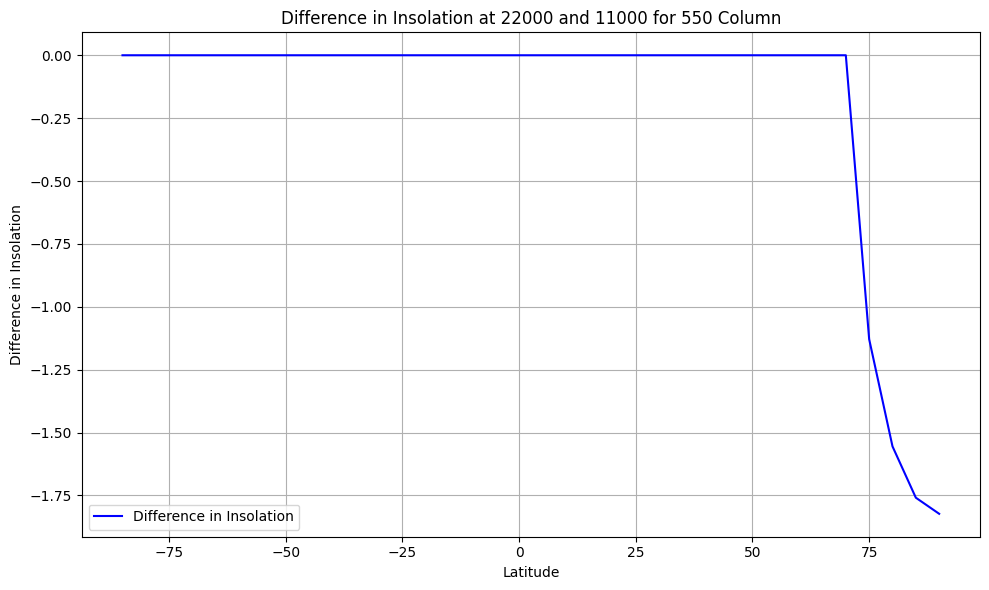

In [25]:
import numpy as np

# Initialize an empty list to store latitude and difference values
results = []

# Loop through the processed_dataframes dictionary to process each dataframe
for file, df in processed_dataframes.items():
    # 1. Extract latitude
    latitude = int(file.split('j_')[1].split('north')[0].split('south')[0])
    # Assign negative value for southern hemisphere
    if 'south' in file:
        latitude = -latitude
    
    # 2. Sample values and calculate difference
    value_at_22000 = df[df['age'] == 22000]['550'].values[0]
    value_at_11000 = df[df['age'] == 11000]['550'].values[0]
    difference =  (value_at_22000-value_at_11000)
    
    # Append the results to the list
    results.append([latitude, difference])

# 3. Convert the list of results into an ndarray
results_array = np.array(results)

# sort the results_array by latitude
results_array = results_array[results_array[:, 0].argsort()]

# print(results_array)



import matplotlib.pyplot as plt

# Extracting latitude and difference values from the results_array
latitudes = results_array[:, 0]
differences = results_array[:, 1]

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(latitudes, differences, '-', label='Difference in Insolation', color='blue')
plt.title('Difference in Insolation at 22000 and 11000 for 550 Column')
plt.xlabel('Latitude')
plt.ylabel('Difference in Insolation')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



In [10]:
latitudes

array([  0.,   5.,  -5.,  10., -10.,  15., -15.,  20., -20.,  25., -25.,
        30., -30.,  35., -35.,  40., -40.,  45., -45.,  50., -50.,  55.,
       -55.,  60., -60.,  65., -65.,  70., -70.,  75., -75.,  80., -80.,
        85., -85.,  90.])

In [11]:
differences

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 1.129, 0.   , 1.555, 0.   , 1.759, 0.   , 1.823])